<a href="https://colab.research.google.com/github/jwj89419/bigdata/blob/main/case%20study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget "https://raw.githubusercontent.com/Kiran-255666/AdventureWorks/main/Adventureworks/Address.csv"
!wget "https://raw.githubusercontent.com/Kiran-255666/AdventureWorks/main/Adventureworks/Customer.csv"
!wget "https://raw.githubusercontent.com/Kiran-255666/AdventureWorks/main/Adventureworks/CustomerAddress.csv"


In [20]:
!pip install pyspark

In [21]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc , col, max, struct
import matplotlib.pyplot as plts

In [22]:
spark = SparkSession.builder.appName('spark_app').getOrCreate()

In [23]:
listenings_csv_path = 'Address.csv'
listening_df = spark.read.format('csv').option('inferSchema', True).option('header', True).load(listenings_csv_path)

In [24]:

listening_df.show()

+---------+--------------------+------------+-----------+----------------+-------------+----------+--------------------+------------+
|AddressID|        AddressLine1|AddressLine2|       City|   StateProvince|CountryRegion|PostalCode|             rowguid|ModifiedDate|
+---------+--------------------+------------+-----------+----------------+-------------+----------+--------------------+------------+
|        9|   8713 Yosemite Ct.|        NULL|    Bothell|      Washington|United States|     98011|268AF621-76D7-4C7...|     00:00.0|
|       11| 1318 Lasalle Street|        NULL|    Bothell|      Washington|United States|     98011|981B3303-ACA2-49C...|     00:00.0|
|       25|    9178 Jumping St.|        NULL|     Dallas|           Texas|United States|     75201|C8DF3BD9-48F0-465...|     00:00.0|
|       28|    9228 Via Del Sol|        NULL|    Phoenix|         Arizona|United States|     85004|12AE5EE1-FC3E-468...|     00:00.0|
|       32|   26910 Indela Road|        NULL|   Montreal|     

In [25]:
listening_df = listening_df.na.drop()

In [27]:
country_counts = listening_df.select('CountryRegion').groupBy('CountryRegion').count()
country_counts.show()

+--------------+-----+
| CountryRegion|count|
+--------------+-----+
| United States|  295|
|        Canada|  115|
|United Kingdom|   40|
+--------------+-----+



In [28]:
q9_list = country_counts.collect()
print(q9_list)

[Row(CountryRegion='United States', count=295), Row(CountryRegion='Canada', count=115), Row(CountryRegion='United Kingdom', count=40)]


In [31]:
labels = [row['CountryRegion'] for row in q9_list]
counts = [row['count'] for row in q9_list]


print(labels)
print(counts)

['United States', 'Canada', 'United Kingdom']
[295, 115, 40]


<BarContainer object of 3 artists>

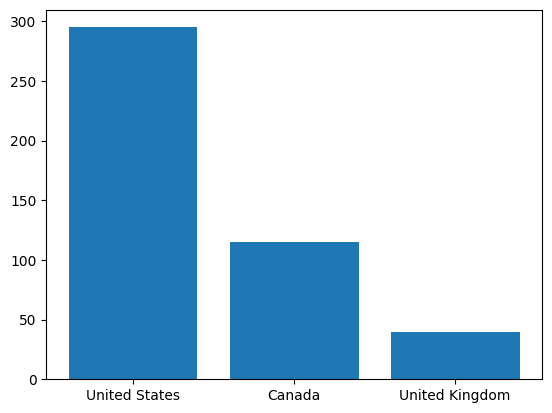

In [32]:
plts.bar(labels, counts)